<h1 align="center"> Python Essentials: Data Visualization.</h1>

    Everett Bergeson
    <Class>
    <Date>

In [161]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import scipy
import math

In [162]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

Labels: ['r', 'm', 'b', 'x mean', 'x var', 'y mean', 'y var']
Q 1 :  ['0.81642', '0.5', '3.0', '9.0', '10.0', '7.50091', '3.75206']
Q 2 :  ['0.81624', '0.5', '3.0', '9.0', '10.0', '7.50091', '3.75239']
Q 3 :  ['0.81629', '0.5', '3.0', '9.0', '10.0', '7.5', '3.74784']
Q 4 :  ['0.81652', '0.5', '3.0', '9.0', '10.0', '7.50091', '3.74841']

The correlation coefficient for all these is very similar, but Q4 has the most closely coorelated data because its data points are so close together and close to the regression line besides one outlier, but that outlier is close to the line
Q1 seems to have a linear pattern with no outliers.
Q2 seems to have a more polynomial pattern with no outliers.
Q3 is very linear, besides one outlier that is far away from the line
Q4 is a vertical line, but all its points are close together and its outlier falls on the linear regression line, so it has the slightly stronger correlation coefficient
The linear regression line is almost identical for each of these gr

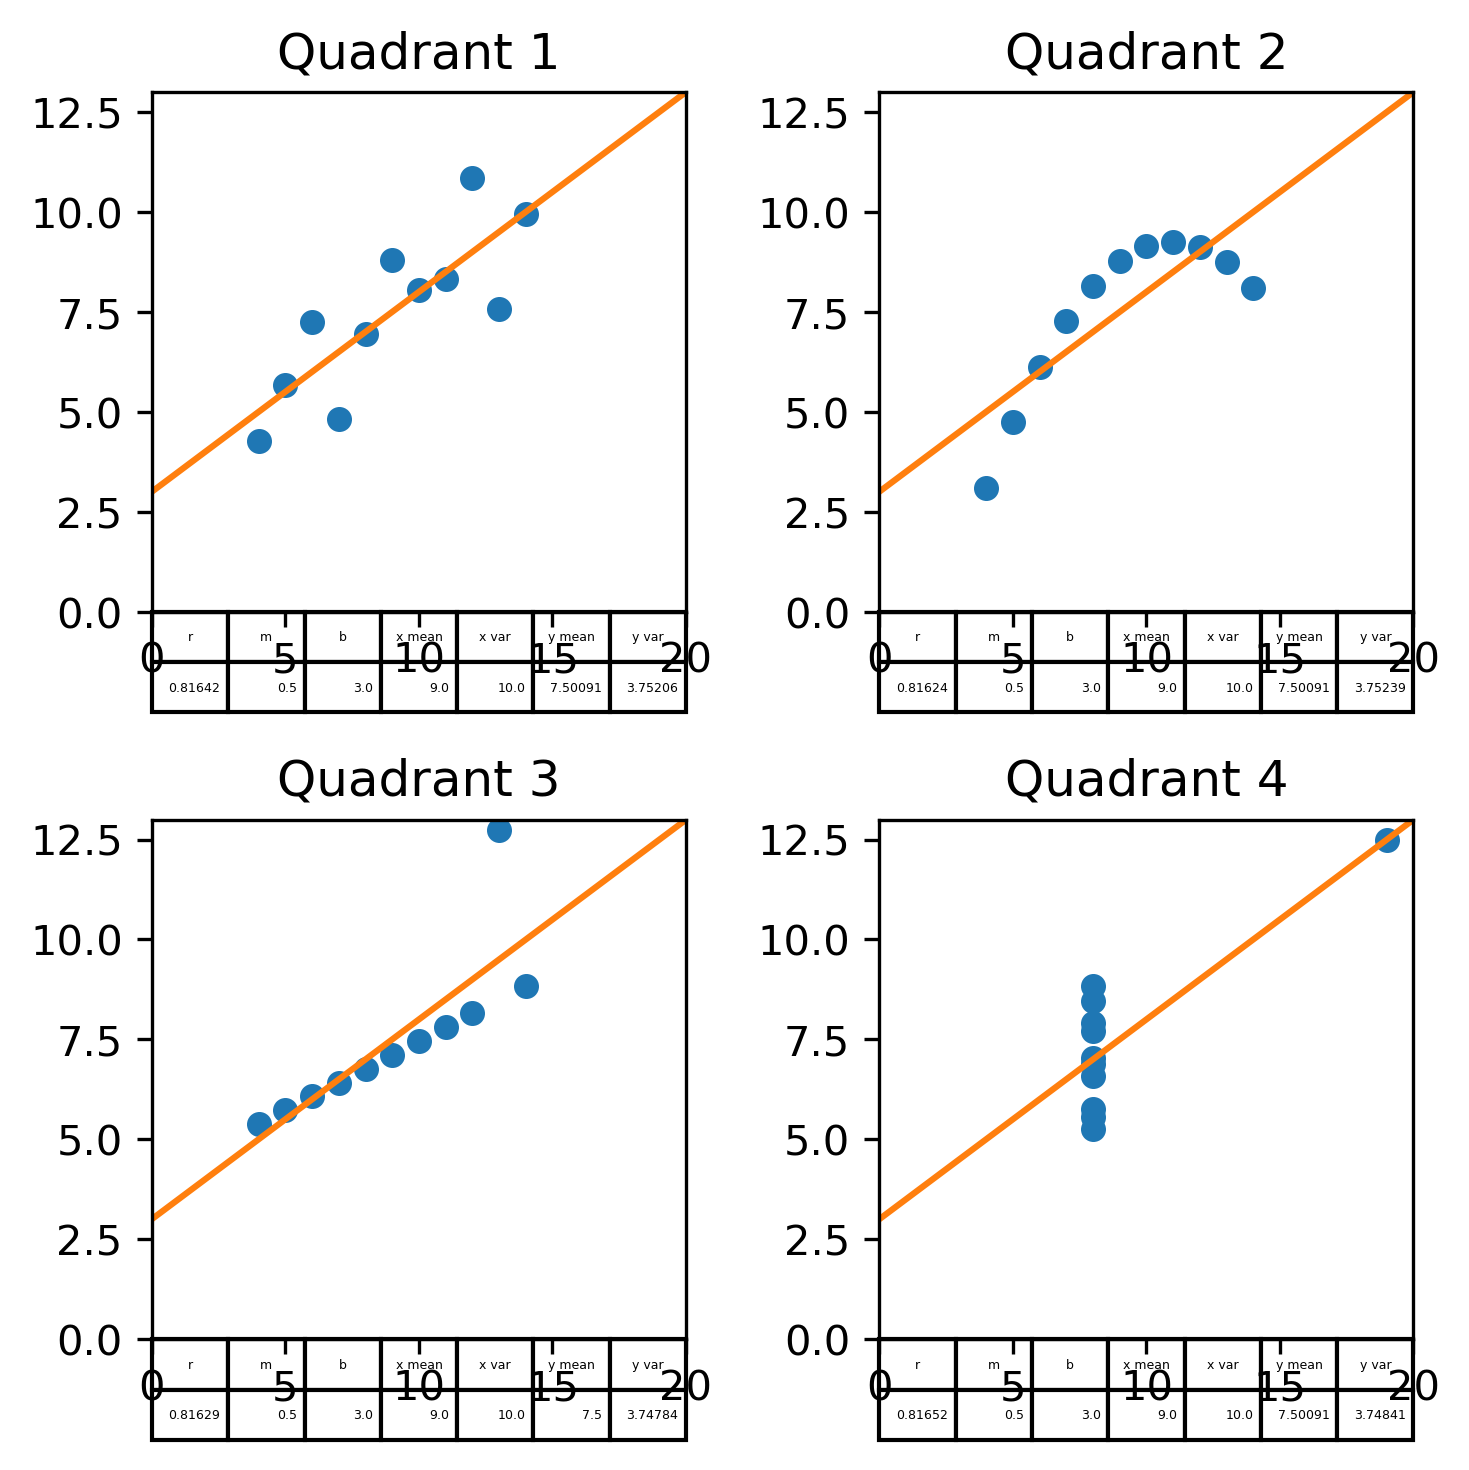

In [163]:
A = np.load("anscombe.npy")

# Create universal variables
x = np.linspace(0, 20, 200)

cell_text = []

col_label = ["r", "m", "b", "x mean", "x var", "y mean", "y var"]
row_label = ("q1", "q2", "q3", "q4")
print("Labels:", col_label)

fig, axs = plt.subplots(2, 2, figsize=(5,5))
for q in range(4):
    # Set axes
    axs[q//2, q%2].axis([0, 20, 0, 13])
    title_str = "Quadrant " + str(q+1)
    axs[q//2, q%2].set_title(title_str)
    
    # First time get 0,1, then 2,3, then 4,5 then 6,7
    col1 = A[:, q*2]
    col2 = A[:, q*2 + 1]
    
    # Plot first one on 0,0, then 0,1, then 1,0, then 1,1
    axs[q//2, q%2].plot(col1, col2, 'o', markersize=5)
    
    # Find and plot linear regression
    m, b, r = st.linregress(col1, col2)[:3]
    axs[q//2, q%2].plot(x, m*x + b)
    
    # Create data analysis for table
    qlist = []
    qlist.append(np.str(round(r, 5)))
    qlist.append(np.str(round(m, 1)))
    qlist.append(np.str(round(b, 1)))
    qlist.append(np.str(round(np.mean(col1), 0)))
    qlist.append(np.str(round(np.var(col1), 0)))
    qlist.append(np.str(round(np.mean(col2), 5)))
    qlist.append(np.str(round(np.var(col2), 5)))
    
    print("Q", q + 1, ": ", qlist)
    # Plot table
    table = axs[q//2, q%2].table(cellText=[qlist], colLabels=col_label, loc='bottom')
    table.set_fontsize(14)

print()
print("The correlation coefficient for all these is very similar, but Q4 has the most",
      "closely coorelated data because its data points are so close together and close",
      "to the regression line besides one outlier, but that outlier is close to the line")
print("Q1 seems to have a linear pattern with no outliers.")
print("Q2 seems to have a more polynomial pattern with no outliers.")
print("Q3 is very linear, besides one outlier that is far away from the line")
print("Q4 is a vertical line, but all its points are close together and its outlier falls on the",
     "linear regression line, so it has the slightly stronger correlation coefficient")
print("The linear regression line is almost identical for each of these graphs")
print("The x mean and variance is identical for each of these graphs")
print("For Q1, 2, and 3, our x values seem to be evenly spaced out.")
print("If it wasn't for Q4's outlier, its x variance would be 0.")
print("The y mean is almost identical for each of the graphs")
print("The y variance is slightly higher for Q1 and Q2 since they have the most vertical movement between points")
    
plt.tight_layout()
plt.show()


### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

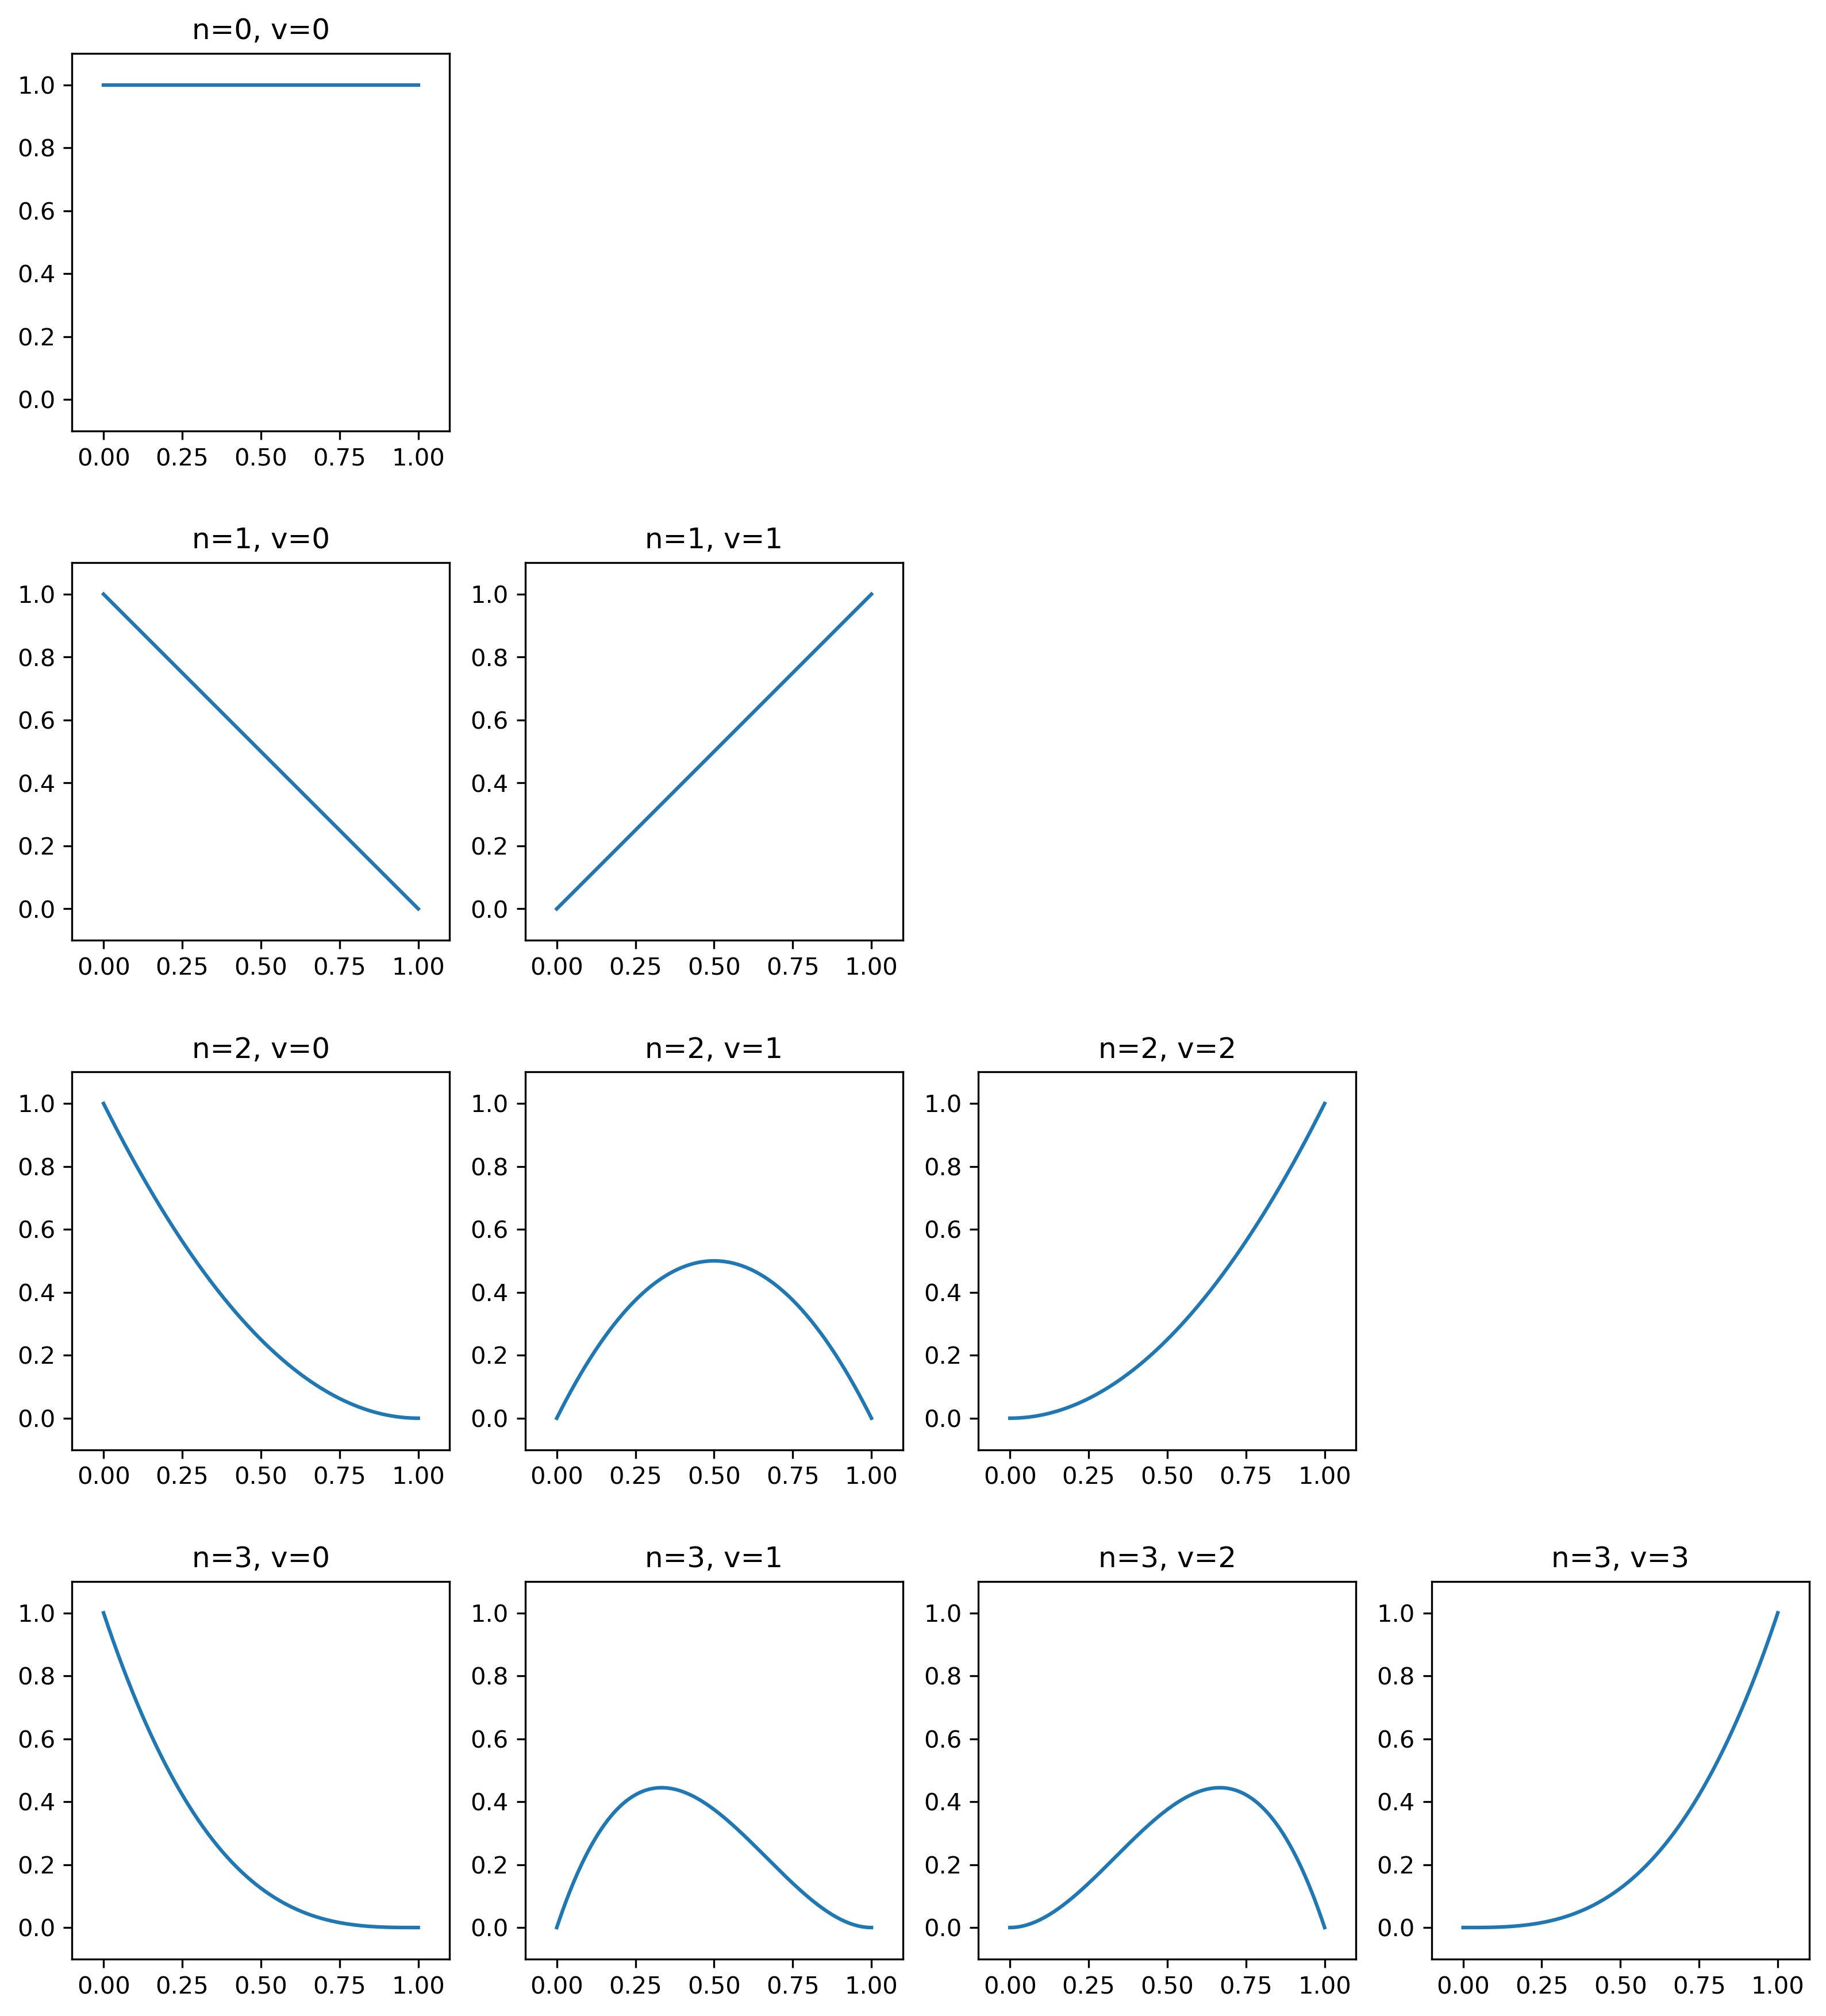

In [164]:
fig, axs = plt.subplots(4, 4, figsize=(13,15))
x = np.linspace(0, 1, 200)

# Create our formula for Bernstein basis polynomials
b = lambda n, v, x : scipy.special.binom(n, v) * (x**v) * ((1-x)**(n-v))

# Loop through each of our subplots, with v starting at 0 and going to n
for n_i in range(0, 4):
    for v_i in range(n_i + 1):
        axs[n_i, v_i].plot(x, b(n_i, v_i, x))
        title_str = "n="+str(n_i)+", v="+str(v_i)
        axs[n_i, v_i].set_title(title_str)
        axs[n_i, v_i].axis([-0.1, 1.1, -0.1, 1.1]) 
        axs[n_i, v_i].set_aspect("equal")

# Make the other unused ones where v > n disappear
for j in range(0, 4):
    for k in range (j+1, 4):
        axs[j,k].set_visible(False)
        
plt.show()

### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

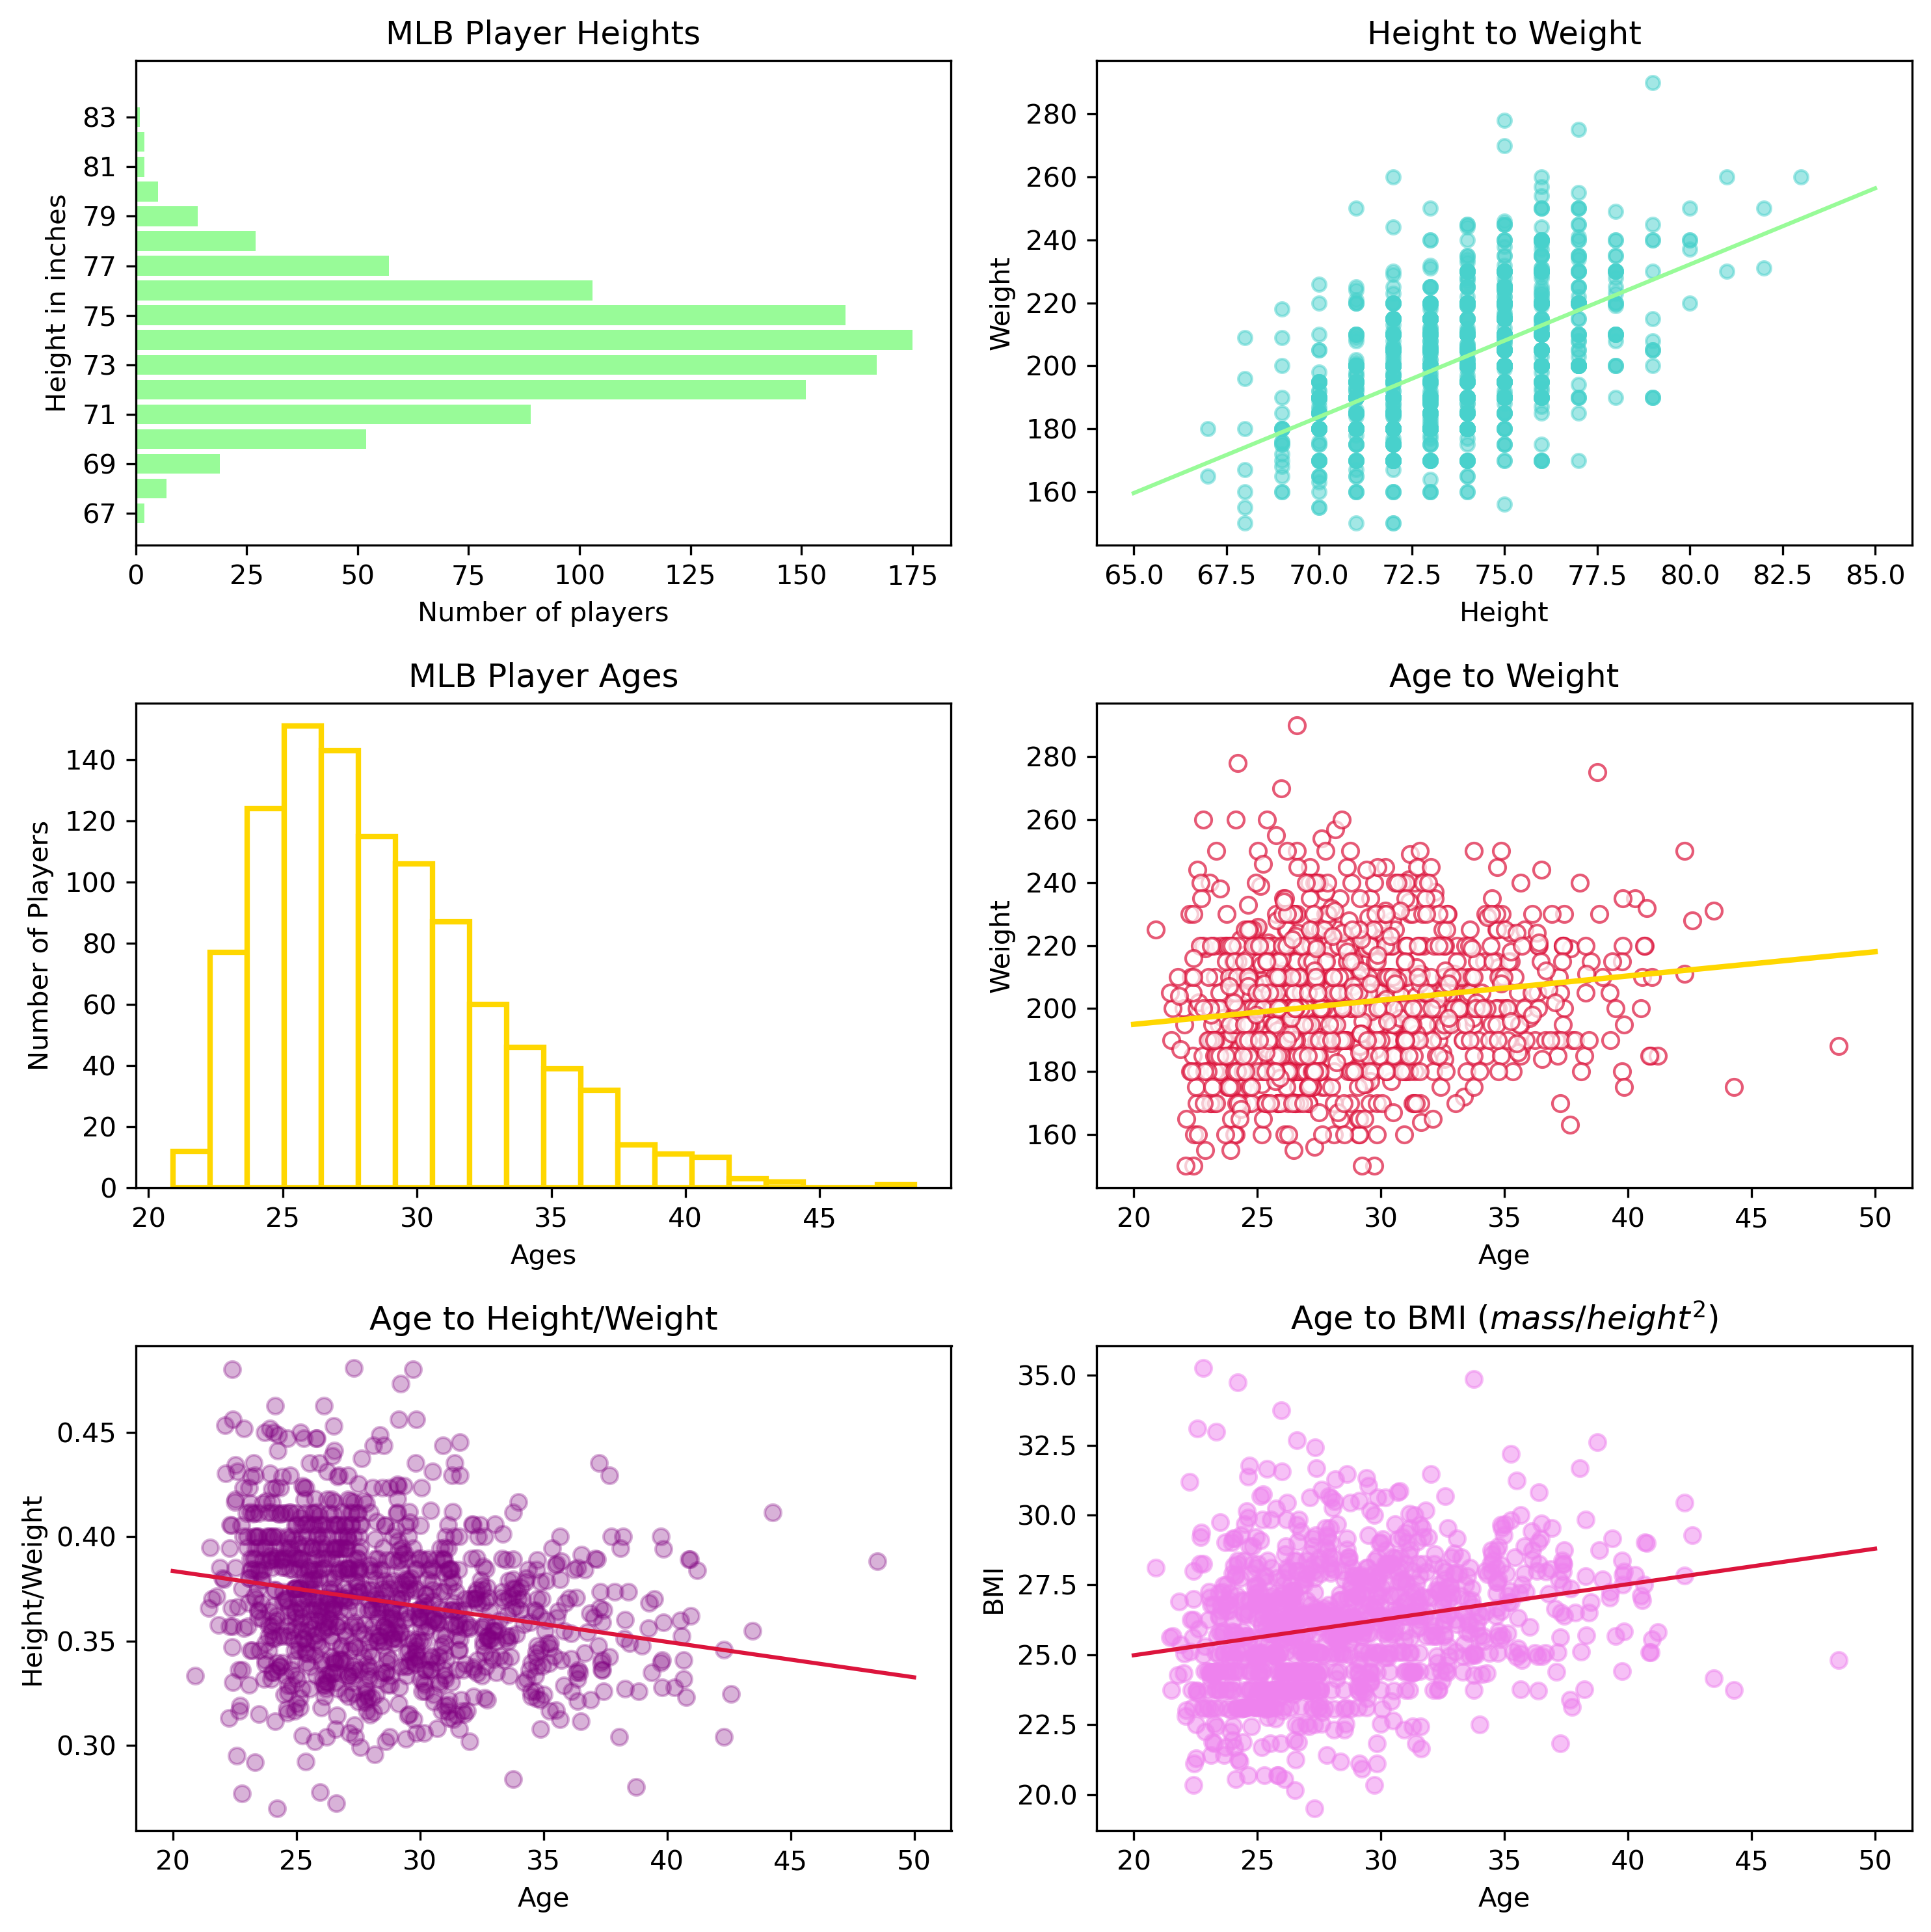

In [165]:
height, weight, age = np.load("MLB.npy").T
plt.figure(figsize=(10,10))

# Create bar graph with player heights
ax1 = plt.subplot(321)
values = np.arange(67,85)
values = values *0
# Find out which players are in each height category
for h in height:
    values[int(h)-67] += 1
positions = np.arange(67, 85)
labels = [str(i) for i in positions]
ax1.barh(positions, values, align="center", color="palegreen")
plt.sca(ax1)
plt.yticks(positions[::2], labels[::2])
ax1.set_ylabel("Height in inches")
ax1.set_xlabel("Number of players")
ax1.set_title("MLB Player Heights")

# Plot height to weight
ax2 = plt.subplot(322)
ax2.plot(height, weight, "o", markersize=5, alpha=.5, color="mediumturquoise")
m, b, r = st.linregress(height, weight)[:3]
x = np.linspace(65, 85, 200)
ax2.plot(x, m*x + b, color="palegreen")
ax2.set_xlabel("Height")
ax2.set_ylabel("Weight")
ax2.set_title("Height to Weight")

# Create age histogram
ax3 = plt.subplot(323)
ax3.hist(age, bins=20, color="white", edgecolor='gold', linewidth=2)
ax3.set_title("MLB Player Ages")
ax3.set_xlabel("Ages")
ax3.set_ylabel("Number of Players")

# Plot age to weight
ax4 = plt.subplot(324)
ax4.scatter(age, weight, alpha=.7, color='white', edgecolor='crimson')
m4, b4, r4 = st.linregress(age, weight)[:3]
x = np.linspace(20, 50, 200)
ax4.plot(x, m4*x + b4, color="gold", linewidth=2)
ax4.set_xlabel("Age")
ax4.set_ylabel("Weight")
ax4.set_title("Age to Weight")

# Plot height/weight ratio to age
ax5 = plt.subplot(325)
ax5.scatter(age, height/weight, alpha=.3, color='purple')
m5, b5, r5 = st.linregress(age, height/weight)[:3]
x = np.linspace(20, 50, 200)
ax5.plot(x, m5*x + b5, color='crimson')
ax5.set_xlabel("Age")
ax5.set_ylabel("Height/Weight")
ax5.set_title("Age to Height/Weight")

# Plot BMI vs age
ax6 = plt.subplot(326)
ax6.scatter(age, (weight*0.453592)/((height*0.0254)**2), alpha=.5, color='violet')
m6, b6, r6 = st.linregress(age, (weight*0.453592)/((height*0.0254)**2))[:3]
x = np.linspace(20, 50, 200)
ax6.plot(x, m6*x + b6, color='crimson')
ax6.set_xlabel("Age")
ax6.set_ylabel("BMI")
ax6.set_title(r"Age to BMI ($mass/height^{}$)".format("2"))

plt.tight_layout()
plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

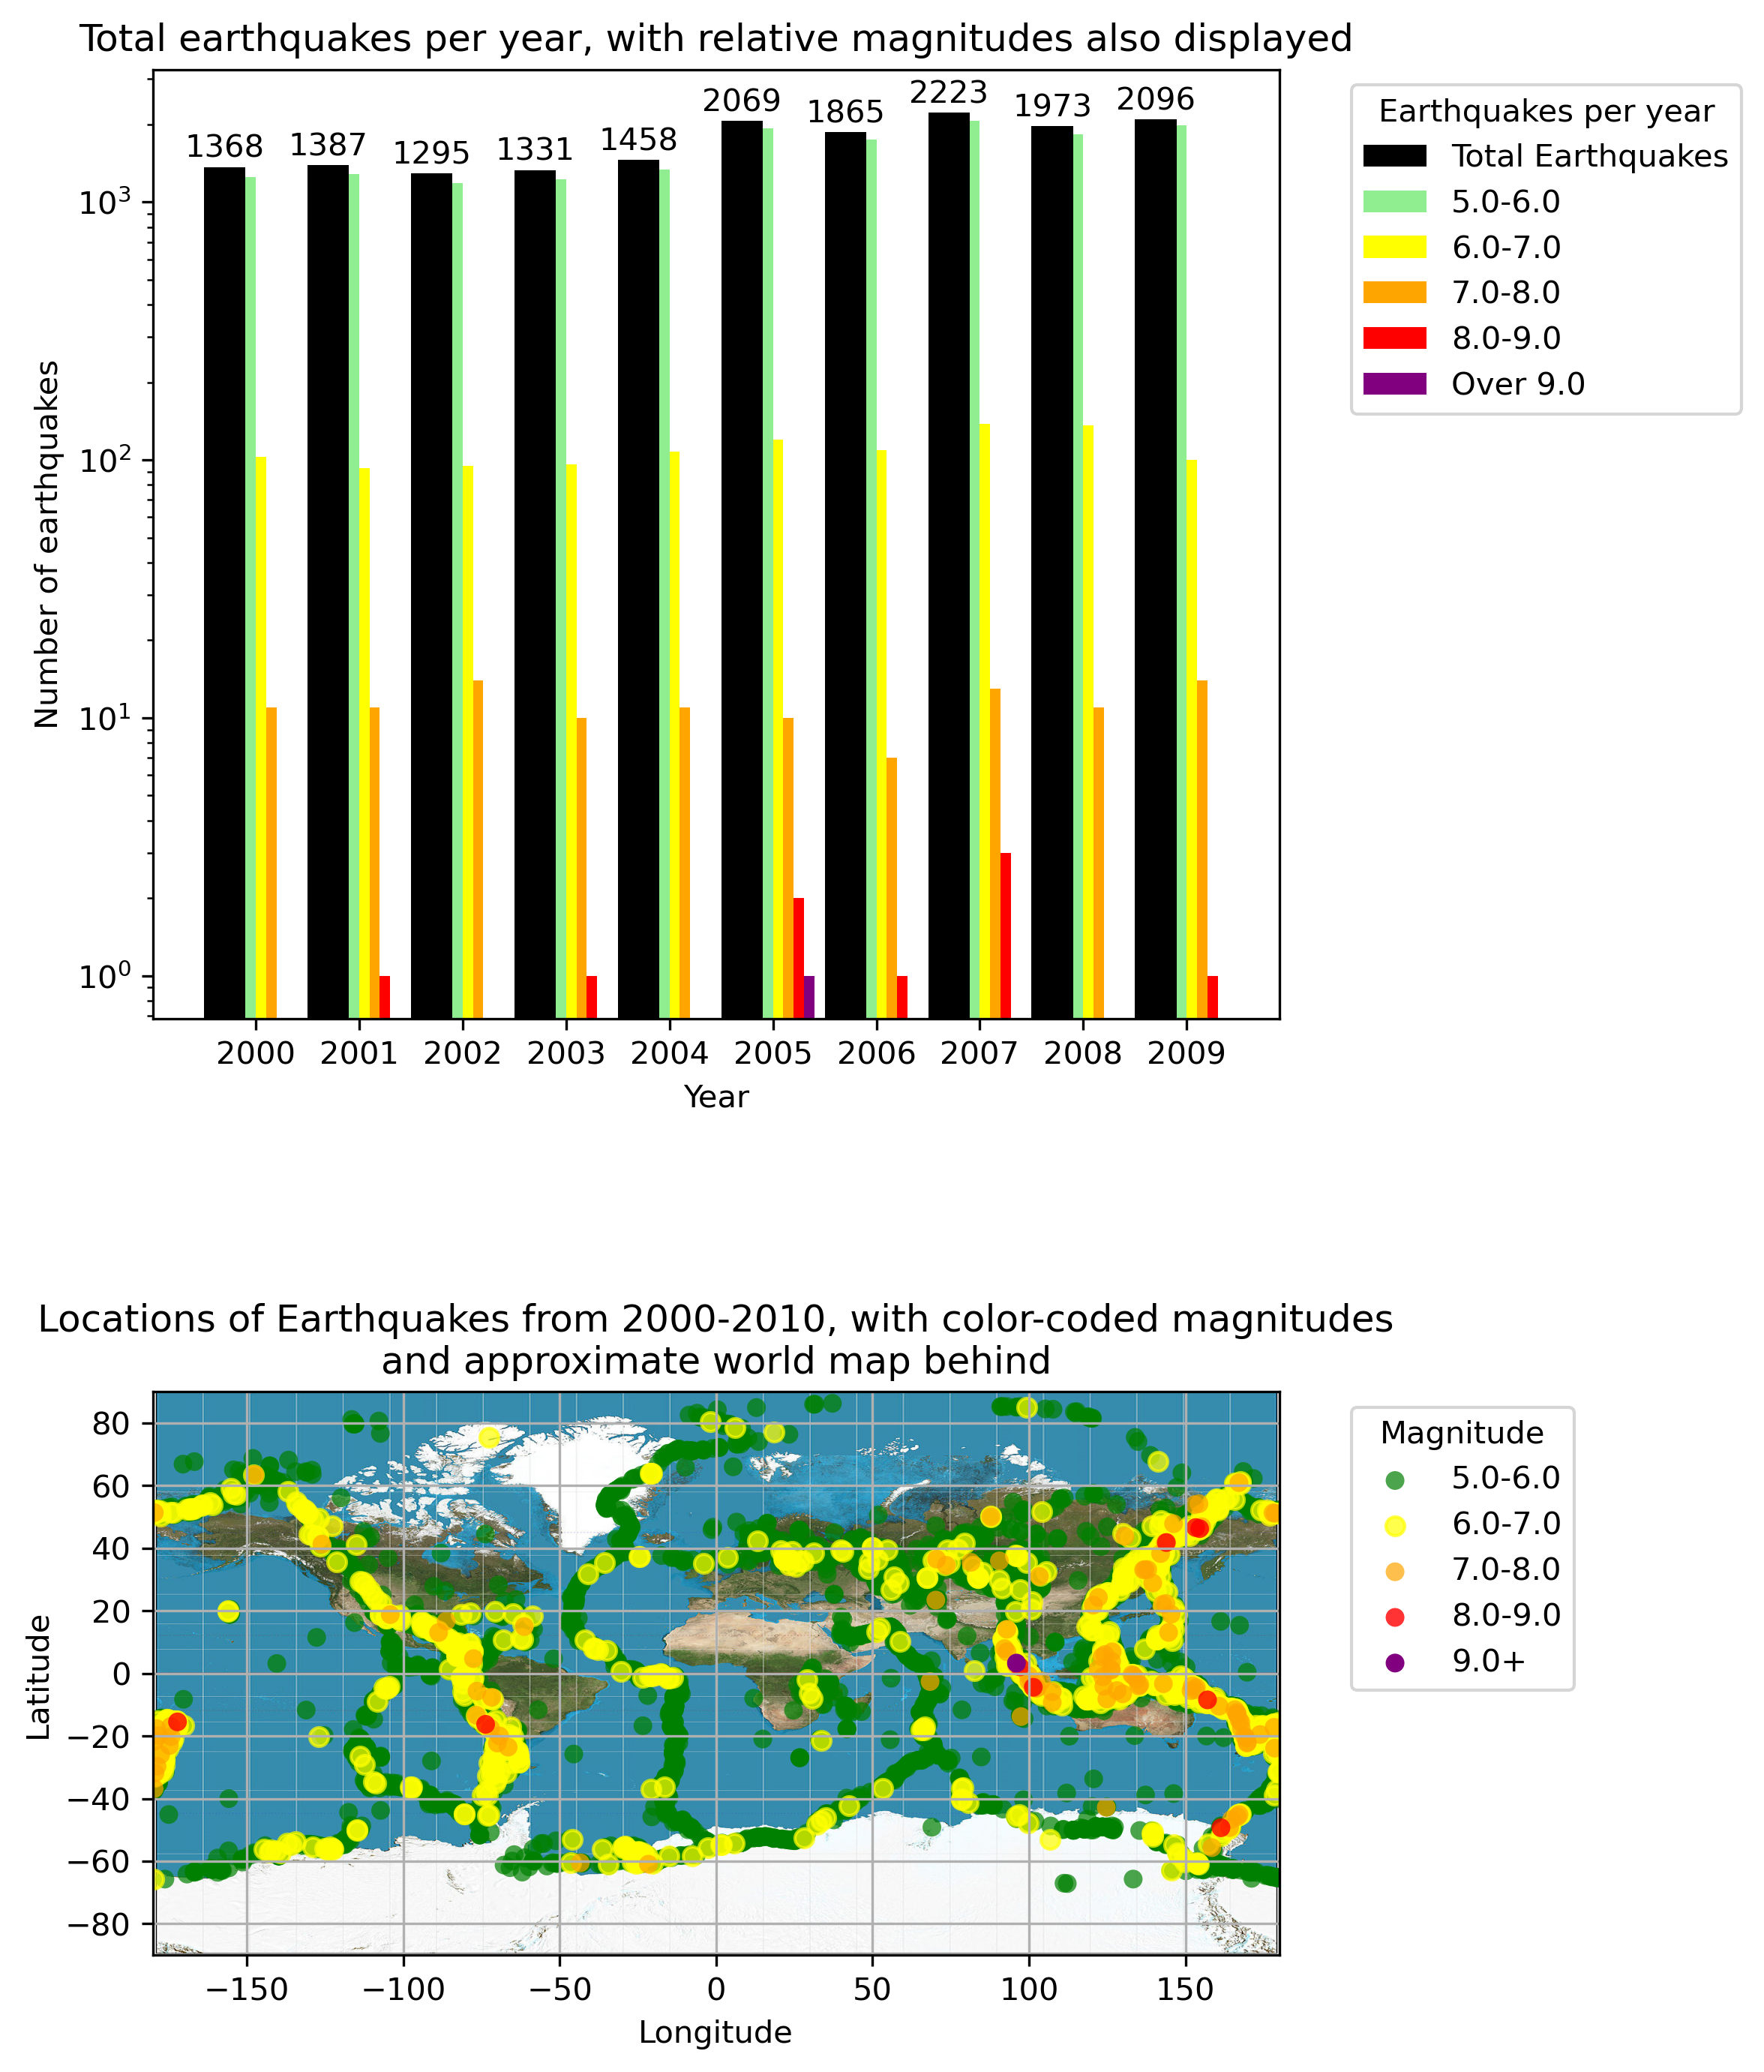

In [166]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T
img = plt.imread("theworldmap.png")
plt.figure(figsize=(8,10))

# Start by sorting out the ranges of magnitude each index falls under
sub6 = []
sub7 = []
sub8 = []
sub9 = []
over9 = []
for i in range(len(magnitudes)):
    if magnitudes[i] <=6:
        sub6.append(i)
    elif magnitudes[i] <=7:
        sub7.append(i)
    elif magnitudes[i] <=8:
        sub8.append(i)
    elif magnitudes[i] <=9:
        sub9.append(i)
    else:
        over9.append(i)

# We'll display a stacked bar chart of how many earthquakes happen each year, color coded by 
ax3 = plt.subplot(211)
ind = np.arange(2000,2010)

# First layer: how many earthquakes in that year with magnitude 5.0-6.0
sub6years = ind * 0
for j in years[sub6]:
    sub6years[math.floor(j)-2000] += 1

# Second layer
sub7years = ind * 0
for j in years[sub7]:
    sub7years[math.floor(j)-2000] += 1

# Third layer
sub8years = ind * 0
for j in years[sub8]:
    sub8years[math.floor(j)-2000] += 1

# Third layer
sub9years = ind * 0
for j in years[sub9]:
    sub9years[math.floor(j)-2000] += 1

# Fifth (top) layer
over9years = ind * 0
for j in years[over9]:
    over9years[math.floor(j)-2000] += 1

# Calculate how many total earthquakes happen each year
totalquakes = ind * 0
for k in range(len(ind)):
    totalquakes[k] += sub6years[k] + sub7years[k] + sub8years[k] + sub9years[k] + over9years[k]

# Display each bar for each year
totq = ax3.bar(ind-.3, totalquakes, .4, label="Total Earthquakes", color="black")   
ax3.bar(ind-.05, sub6years, .1, label="5.0-6.0", color="lightgreen")
ax3.bar(ind+.05, sub7years, .1, label="6.0-7.0", color="yellow")
ax3.bar(ind+.15, sub8years, .1, label="7.0-8.0", color="orange")
ax3.bar(ind+.25, sub9years, .1, label="8.0-9.0", color="red")
ax3.bar(ind+.35, over9years, .1, label="Over 9.0", color="purple")

# Change to logarithmic scale, title, legend
plt.sca(ax3)
plt.yscale('log')
ax3.legend(title='Earthquakes per year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.set_title("Total earthquakes per year, with relative magnitudes also displayed")
ax3.set_ylabel("Number of earthquakes")
ax3.set_xlabel("Year")
ax3.set_xticks(ind)
ax3.set_xticklabels(ind)

# Create labels for total number of earthquakes each year
for bar in totq:
    height = bar.get_height()
    ax3.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

# Second plot
# Create plot with world map in background, mapping latitude and longitude, with colors indicating severity        
ax2 = plt.subplot(212)
ax2.scatter(longitude[sub6], latitude[sub6], color="green", alpha=.7, edgecolor="none", label="5.0-6.0")
ax2.scatter(longitude[sub7], latitude[sub7], color="yellow", alpha=.7, label="6.0-7.0")
ax2.scatter(longitude[sub8], latitude[sub8], color="orange", alpha=.7, edgecolor="none", label="7.0-8.0")
ax2.scatter(longitude[sub9], latitude[sub9], color="red", alpha=.8, edgecolor="none", label="8.0-9.0")
ax2.scatter(longitude[over9], latitude[over9], color="purple", edgecolor="none", label="9.0+")

# Create legend, set aspect equal, label, title
ax2.legend(title='Magnitude', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_aspect("equal")
ax2.set_ylabel("Latitude")
ax2.set_xlabel("Longitude")
ax2.set_title("Locations of Earthquakes from 2000-2010, with color-coded magnitudes\nand approximate world map behind")

# Display world map in background
ax2.imshow(img, extent=[-180, 180, -90, 90])
ax2.grid(True)




plt.tight_layout()
plt.show()



### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

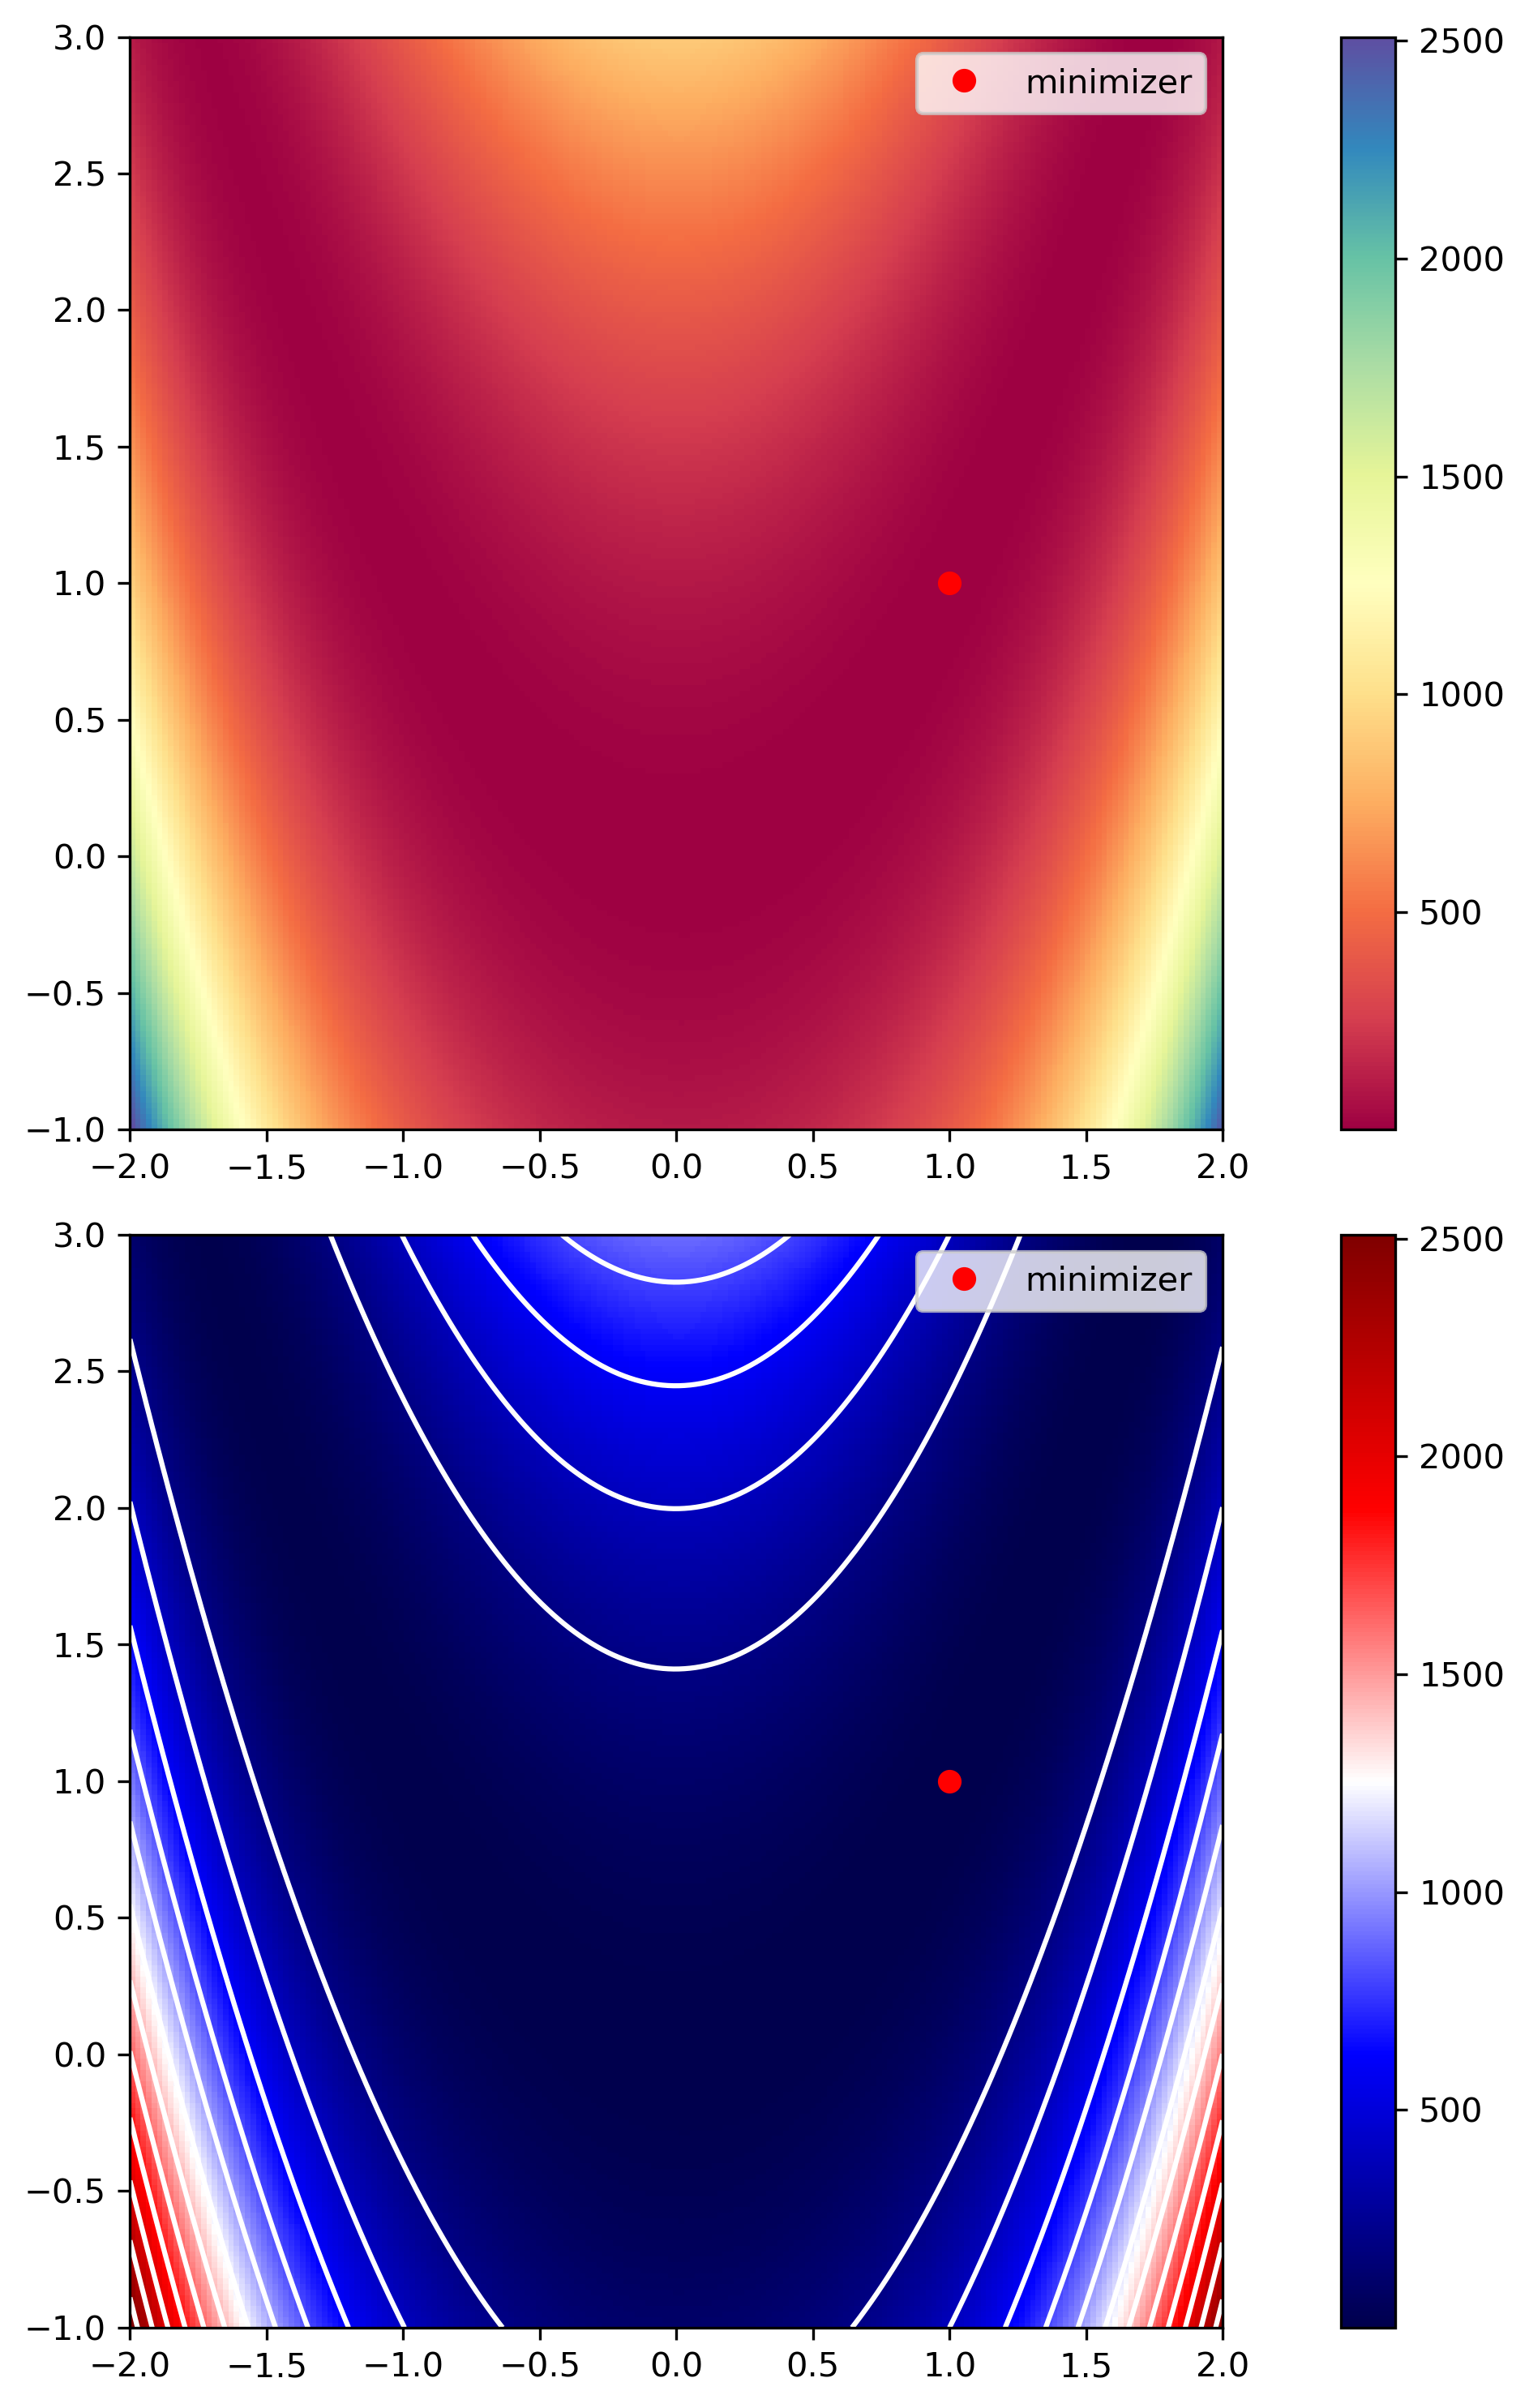

In [167]:
plt.figure(figsize=(10,10))

x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)


X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + (100*((Y - X**2)**2))
ax1 = plt.subplot(211)
color1 = ax1.pcolormesh(X, Y, Z, cmap="Spectral") 
ax1.set_aspect("equal")
plt.colorbar(color1, ax=ax1)
ax1.plot(1,1, 'ro', label="minimizer")
ax1.legend()
#ax1.axis([-2,2,-1,3])

ax2 = plt.subplot(212)
ax2.contour(X, Y, Z, 12, colors="white")
color2 = ax2.pcolormesh(X, Y, Z, cmap="seismic")
ax2.set_aspect("equal")
plt.colorbar(color2, ax=ax2)
ax2.plot(1,1, 'ro', label="minimizer")
ax2.legend()
#ax2.axis([-2,2,-1,3])

plt.tight_layout()
plt.show()


### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

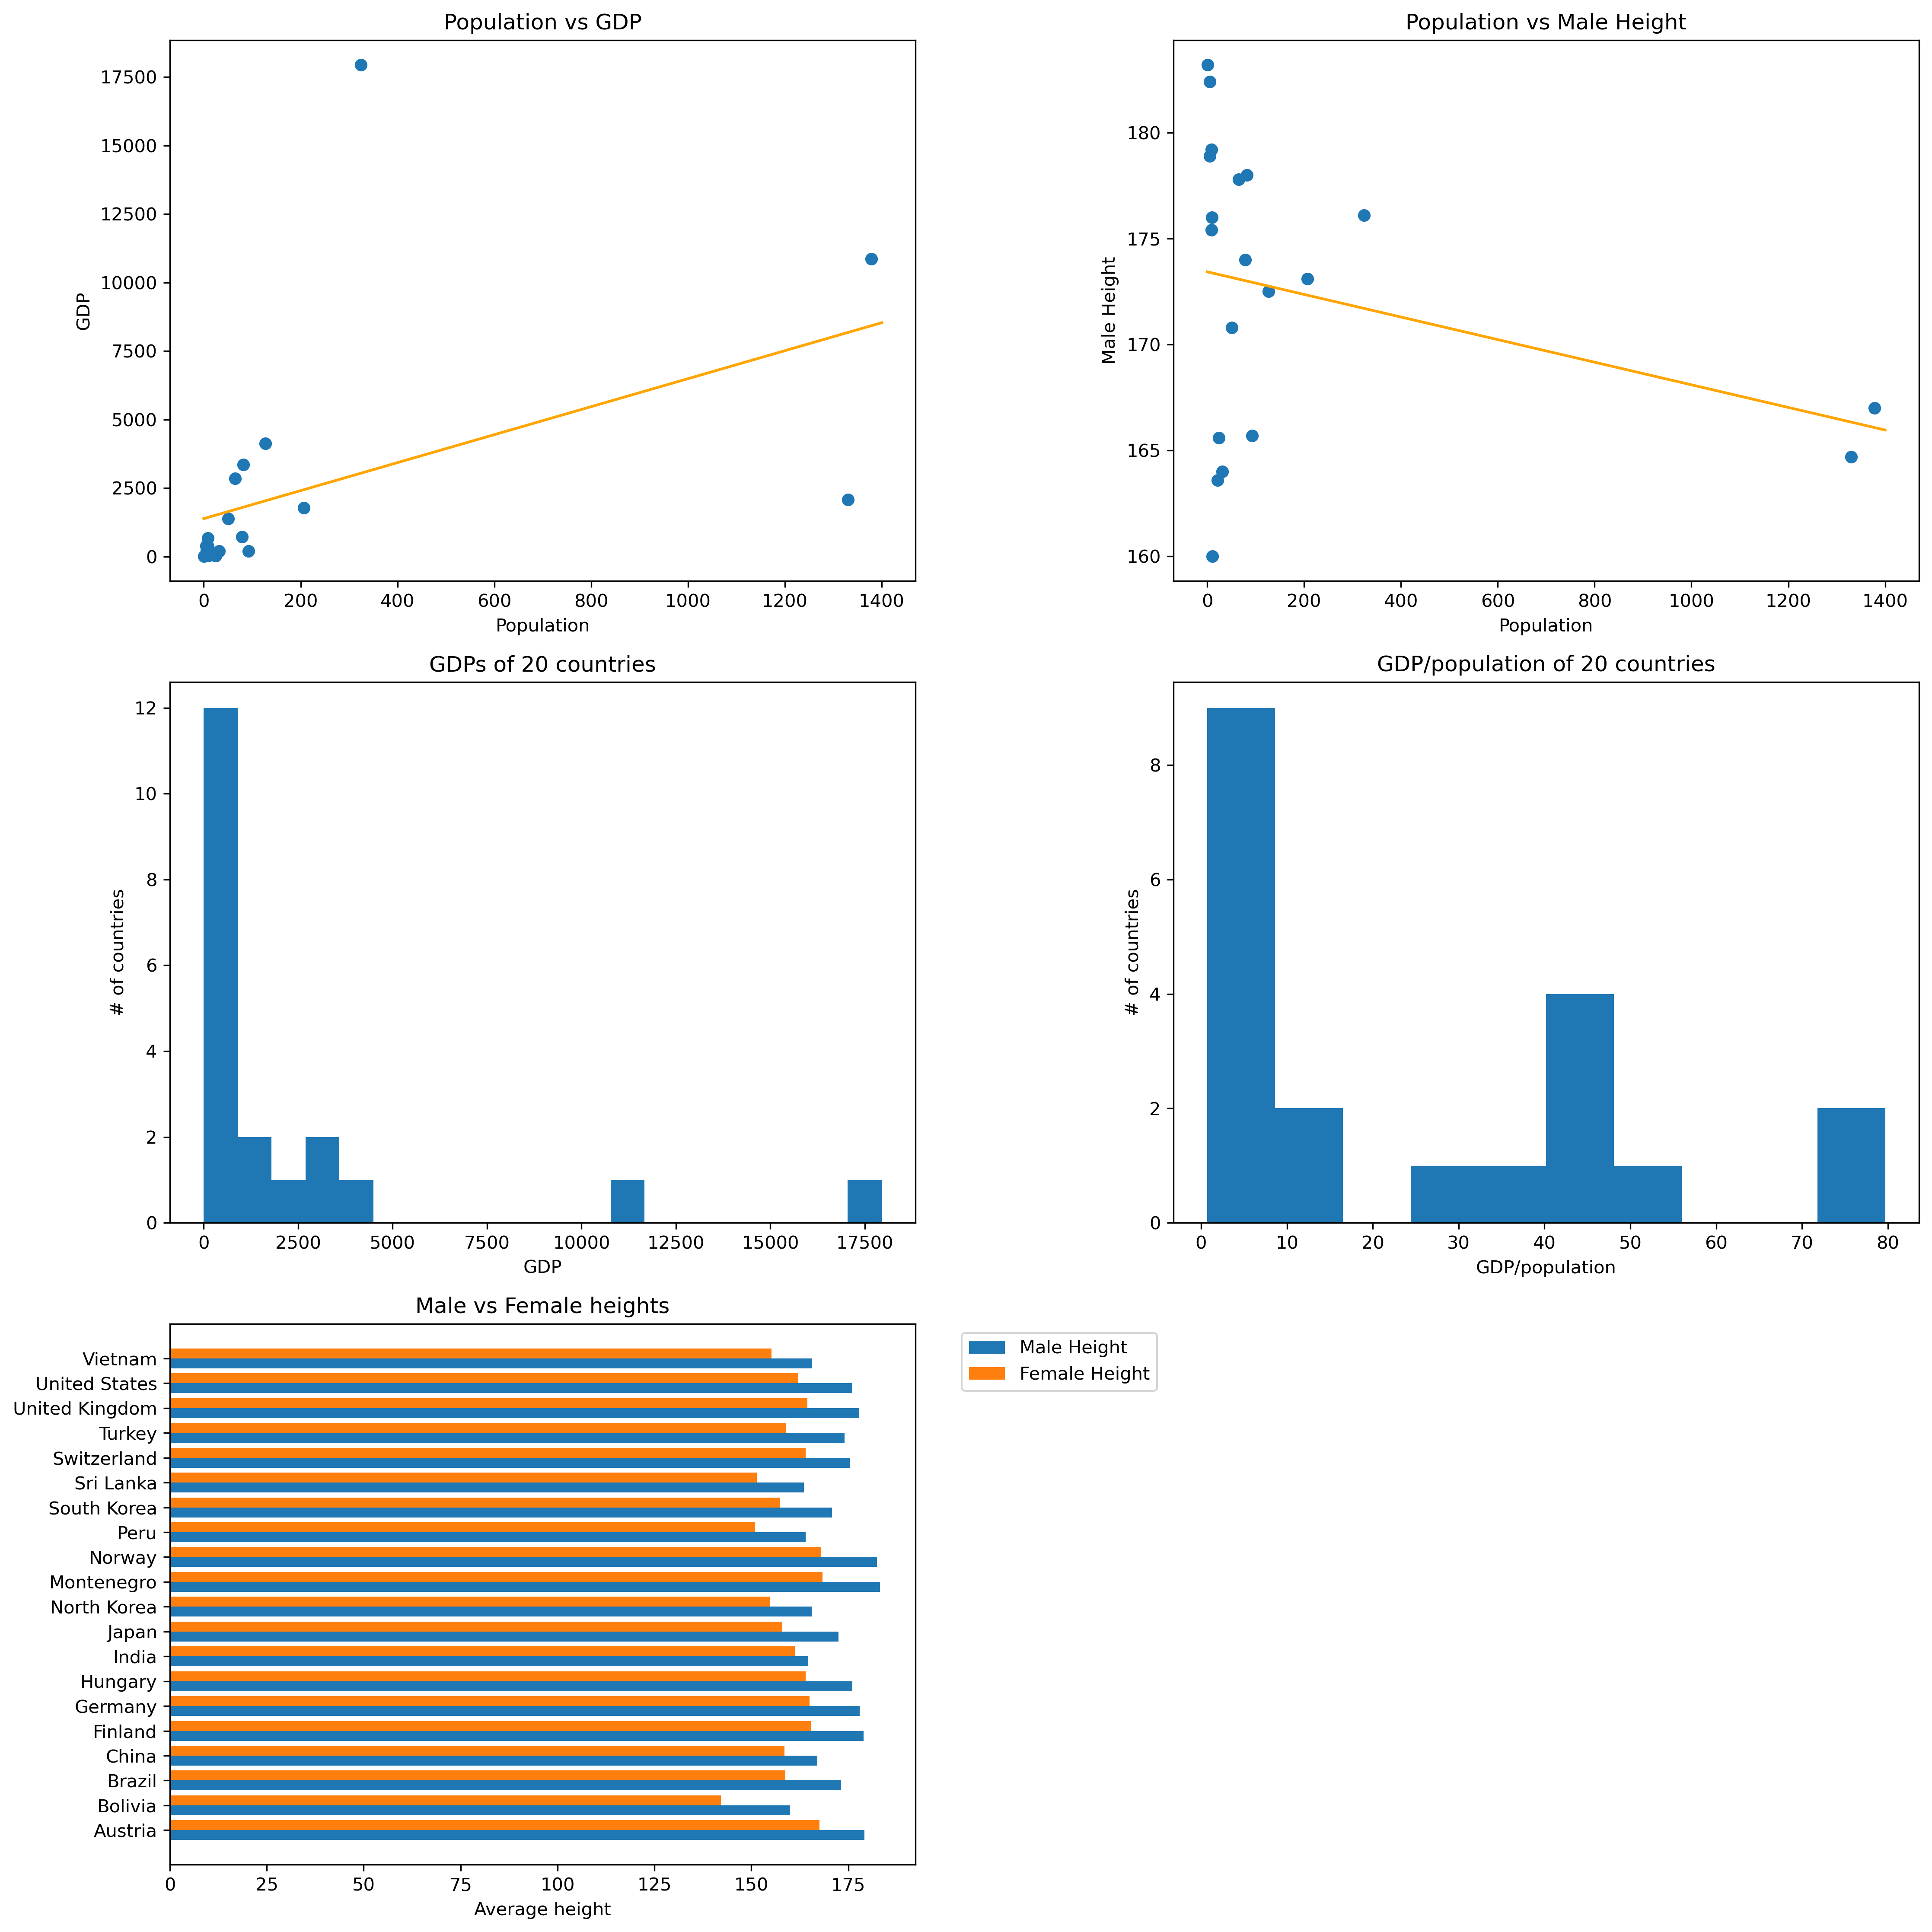

In [170]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

fig, axs = plt.subplots(3,2, figsize=(15,15))
x = np.linspace(0,1400, 20000)

# Plot population vs gdp
axs[0,0].scatter(population, gdp)
axs[0,0].set_title("Population vs GDP")
axs[0,0].set_xlabel("Population")
axs[0,0].set_ylabel("GDP")
m, b, r = st.linregress(population, gdp)[:3]
axs[0,0].plot(x, m*x+b, color='orange')

# Plot population vs gdp/population
axs[0,1].scatter(population, male)
axs[0,1].set_title("Population vs Male Height")
axs[0,1].set_xlabel("Population")
axs[0,1].set_ylabel("Male Height")
m, b, r = st.linregress(population, male)[:3]
axs[0,1].plot(x, m*x+b, color='orange')

# Plot the gdp in a histogram
axs[1,0].hist(gdp, bins=20)
axs[1,0].set_title("GDPs of 20 countries")
axs[1,0].set_xlabel("GDP")
axs[1,0].set_ylabel("# of countries")

# Plot the gdp/population in a histogram
axs[1,1].hist(gdp/population, bins=10)
axs[1,1].set_title("GDP/population of 20 countries")
axs[1,1].set_xlabel("GDP/population")
axs[1,1].set_ylabel("# of countries")

# Plot the male vs female heights in a double bar graph
ind = np.arange(0,20)
axs[2,0].barh(ind-.2, male, .4, label="Male Height")
axs[2,0].barh(ind+.2, female, .4, label="Female Height")
axs[2,0].set_xlabel('Average height')
axs[2,0].set_title('Male vs Female heights')
axs[2,0].set_yticks(ind)
axs[2,0].set_yticklabels(countries)
axs[2,0].legend(bbox_to_anchor=(1.05, 1))

axs[2,1].set_visible(False)

plt.tight_layout()
plt.show()
